In [340]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering

In [341]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]

sortset = []


for filename in os.listdir(directory):
    #print(filename)
    if filename.endswith(".txt") and '._' not in filename:
        #txtcont = txtcont + 1
        #print(filename)
        impath = os.path.join(directory, filename)
        nameset.append(impath)
        this_set = dict()
        with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
            for n in f:
                pog = n.split('\t')
                this_set[pog[0]] = pog[-1].count(',')
            f.close()
        try:
            this_set.pop('cell_name')
            this_set.pop('AB')
        except: pass
        dictset.append(this_set)
        sortset.append((impath,this_set))

print(len(dictset),len(nameset))
print(len(dictset),len(nameset))

#for n in range(0,len(snameset)): print(snameset[n])
#print(type(filename))
#for n in sorted(os.listdir(directory)): print(n)
    
#for n in range(0,len(snameset)): print(snameset[n])
nameset,dictset = [],[]


for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

truncator = len(nameset)

30 30
30 30


In [342]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

#nameset,dictset = [],[]
#for n in sorted(sortset): nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))

In [343]:
refnodelist = set(dictset[0])
for n in dictset:
    refnodelist = set(n).intersection(refnodelist)

newdictset = []
for n in dictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
dictset = newdictset

In [344]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [345]:
def single_dim(namein,dictin,seps = '',tier = False):
    namelist,yaxis,xaxis = sorted(list(dictin), key = len ),[],[];target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in namelist:
            yaxis.append(dictin[n])
            xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    else:
        for n in namelist:
            if seps in n:
                target_yaxis.append(dictin[n])
                target_xaxis.append(len(re.sub(r'[A-Z]', '', n)))
            else:
                yaxis.append(dictin[n])
                xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    target_xaxis = np.array(target_xaxis)
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    namein = namein.split('/')[-1][:-4]
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2))
    plt.title('Cellular Division Timing Events in WT C. Elegans Embryo\n'+namein)
    plt.xlabel('Division Event Count');plt.ylabel('Division Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m))
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2))    
    plt.legend(loc='upper left');plt.show()

In [346]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

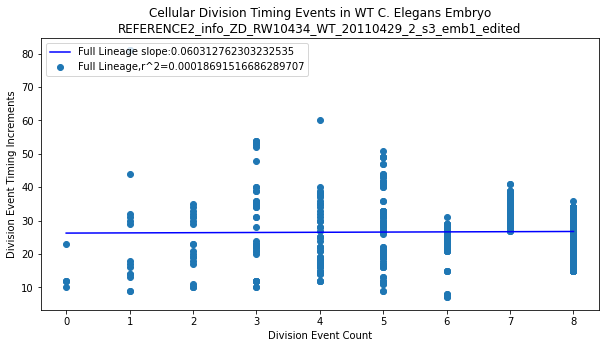

In [347]:
single_dim(nameset[1],dictset[1])

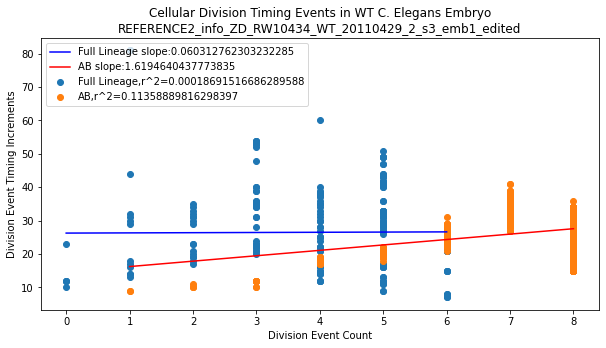

In [348]:
single_dim(nameset[1],dictset[1], seps = 'AB')

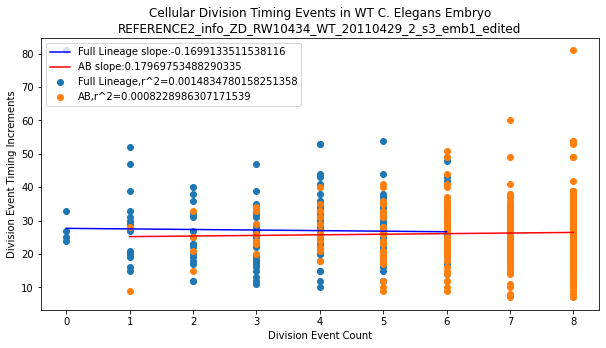

In [349]:
single_dim(nameset[1],scrambledictset[1], seps = 'AB')

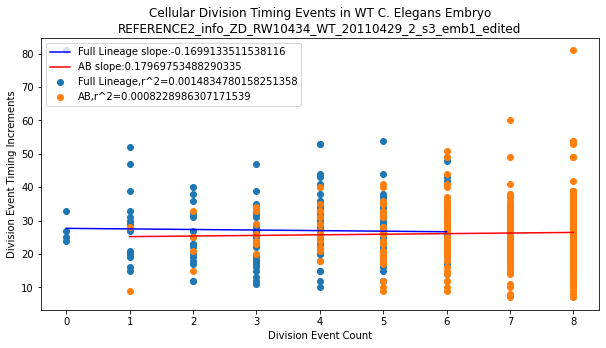

In [350]:
single_dim(nameset[1],scrambledictset[1], seps = 'AB')

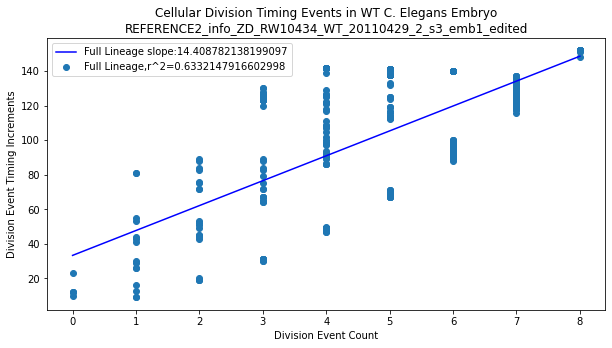

In [351]:
single_dim(nameset[1],globaldictset[1])

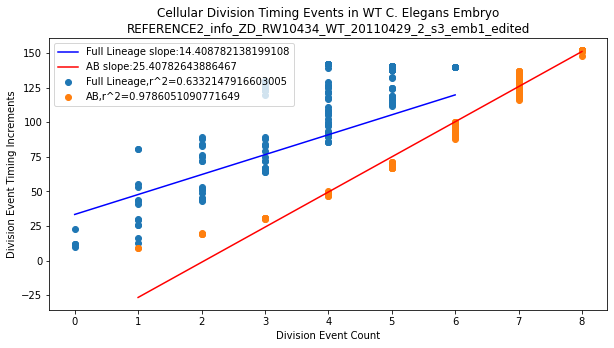

In [352]:
single_dim(nameset[1],globaldictset[1], seps = 'AB')

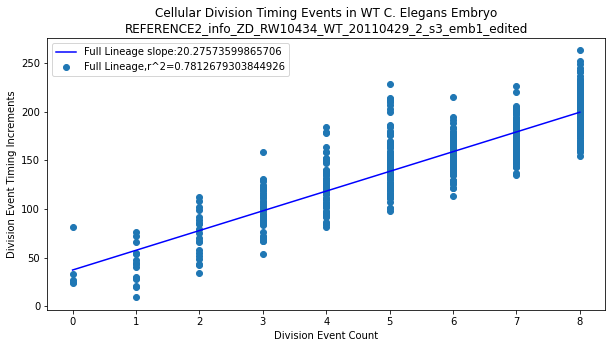

In [353]:
single_dim(nameset[1],globalscrambledictset[1])

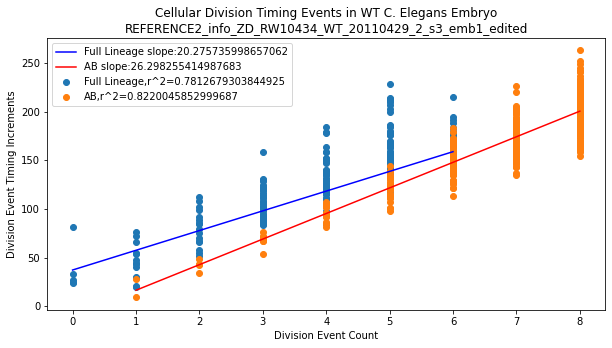

In [354]:
single_dim(nameset[1],globalscrambledictset[1], seps = 'AB')

In [355]:
def single_dim_lineage(namein,dictin,tier = False):
    gong = ['AB','C','D','MS','E']
    Subsetylist = [[],[],[],[],[]]
    Subsetxlist = [[],[],[],[],[]]
    namelist,yaxis,xaxis = sorted(list(dictin), key = len ),[],[];target_xaxis=[];target_yaxis=[]
    if True:
        for n in namelist:
            for m in range(0,len(gong)):
                if gong[m] in n:
                    Subsetylist[m].append(dictin[n])
                    Subsetxlist[m].append(len(re.sub(r'[A-Z]', '', n)))
                    continue
    namein = namein.split('/')[-1][:-4]
    for n in range(0,len(Subsetxlist)):
        plt.scatter(np.array(Subsetxlist[n]),Subsetylist[n], label=gong[n], s = [30] * len(Subsetxlist[n]), alpha = .35)
    plt.title('Cellular Division Timing Events in WT C. Elegans Embryo\n'+namein)
    plt.xlabel('Division Event Count');plt.ylabel('Division Event Timing Increments')
    plt.legend(loc='upper left');plt.show()

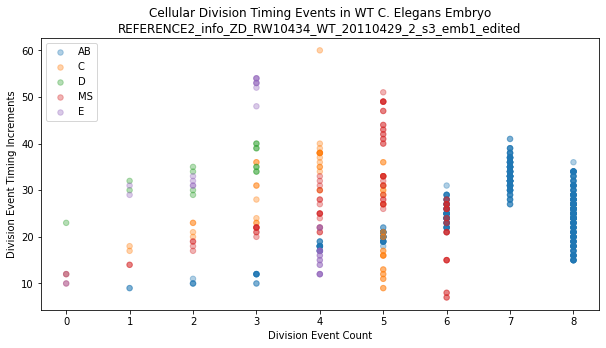

In [356]:
single_dim_lineage(nameset[1],dictset[1])

In [357]:
def dict_to_scatter(name,lis,x,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(lis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()

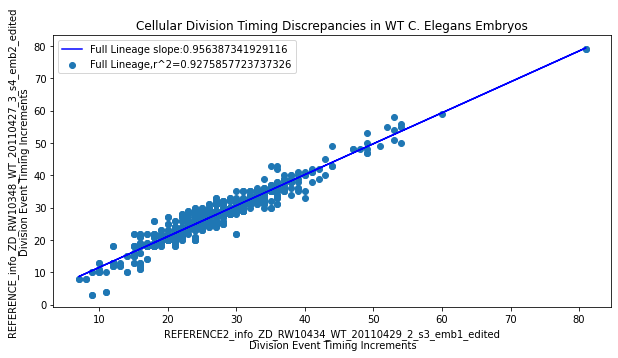

In [358]:
dict_to_scatter(nameset,dictset,1,10,img=True)

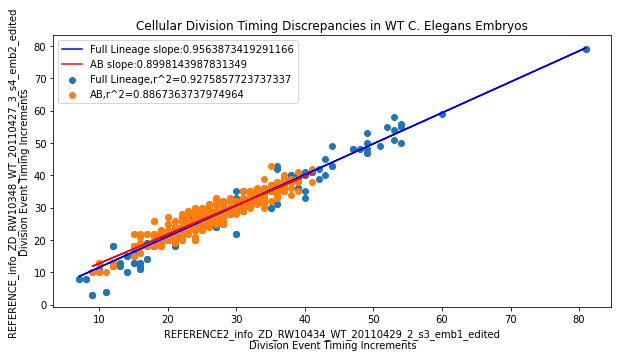

In [359]:
dict_to_scatter(nameset,dictset,1,10,img=True,seps = 'AB')

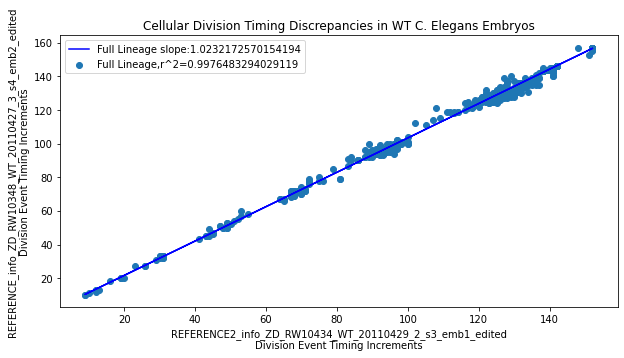

In [360]:
dict_to_scatter(nameset,globaldictset,1,10,img=True)

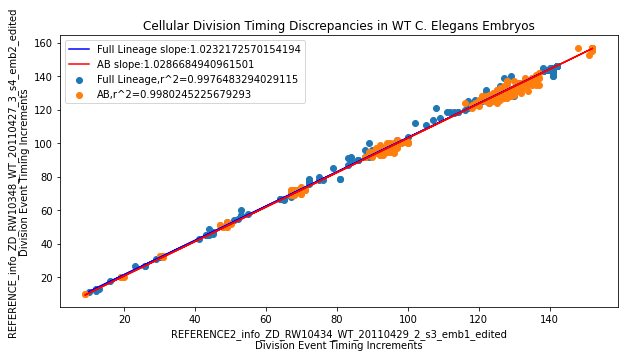

In [361]:
dict_to_scatter(nameset,globaldictset,1,10,img=True, seps = 'AB')

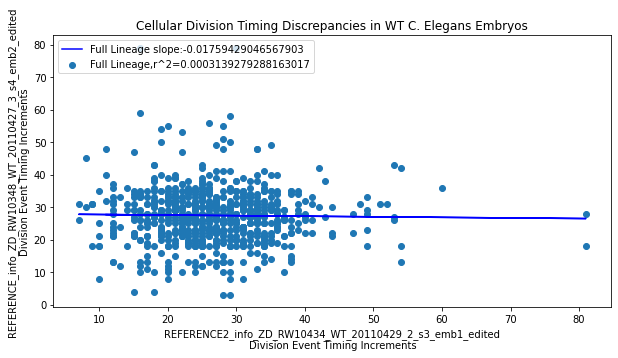

In [362]:
dict_to_scatter(nameset,scrambledictset,1,10,img=True)

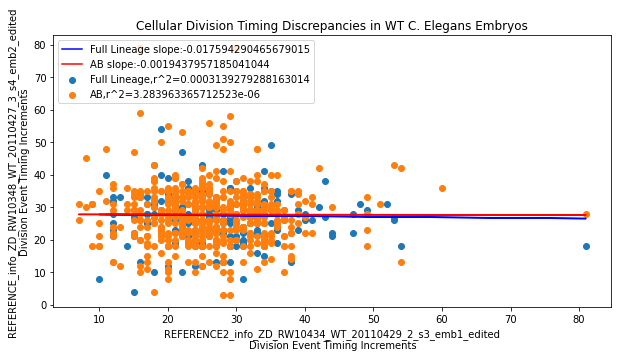

In [363]:
dict_to_scatter(nameset,scrambledictset,1,10,img=True,seps = 'AB')

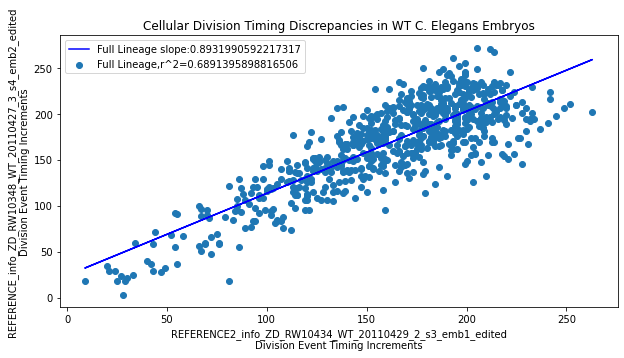

In [364]:
dict_to_scatter(nameset,globalscrambledictset,1,10,img=True)

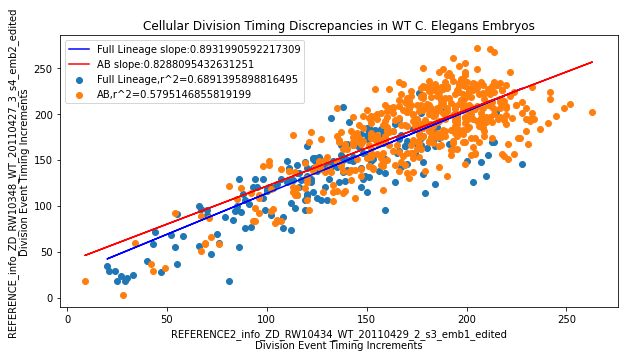

In [365]:
dict_to_scatter(nameset,globalscrambledictset,1,10,img=True,seps = 'AB')

In [366]:
def match_fit(xaxis,yaxis):
    sorted_xaxis = np.array(range(min(xaxis),max(xaxis)))
    xaxis = np.array(xaxis)
    p1 = np.poly1d(np.polyfit(xaxis, yaxis, 1));p2 = np.poly1d(np.polyfit(xaxis, yaxis, 2));p3 = np.poly1d(np.polyfit(xaxis, yaxis, 3))
    plt.scatter(xaxis,yaxis, label='Lineage,r^2=') 
    corr_matrix = np.corrcoef(yaxis, p1(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(xaxis, p1(xaxis), 'b-', label='linear r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p2(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p2(sorted_xaxis), 'r-', label='quad r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p3(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p3(sorted_xaxis), 'g-', label='cubic r^2:'+str(R_sq), )
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos')
    #plt.xlabel(name1+'\nDivision Event Timing Increments')
    #plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    
    plt.legend(loc='upper left')
    plt.show()

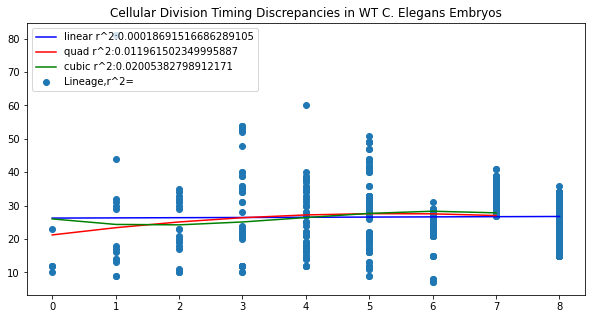

In [367]:
x,y = single_dim(nameset[1],dictset[1],tier = True);match_fit(x,y)

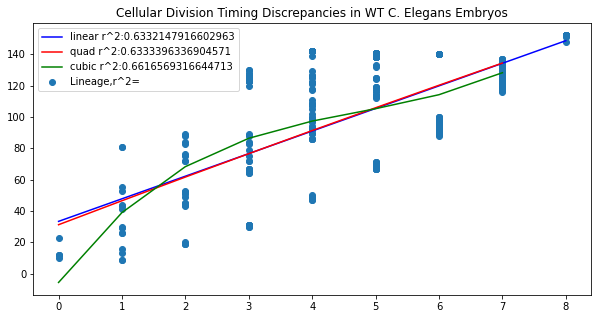

In [368]:
x,y = single_dim(nameset[1],globaldictset[1],tier = True);match_fit(x,y)

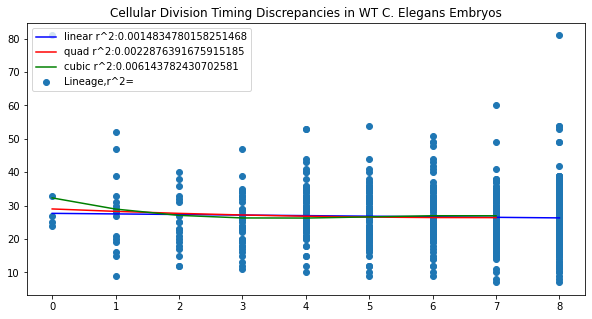

In [369]:
x,y = single_dim(nameset[1],scrambledictset[1],tier = True);match_fit(x,y)

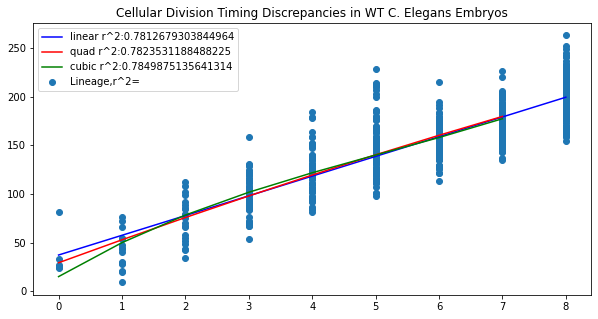

In [370]:
x,y = single_dim(nameset[1],globalscrambledictset[1],tier = True);match_fit(x,y)

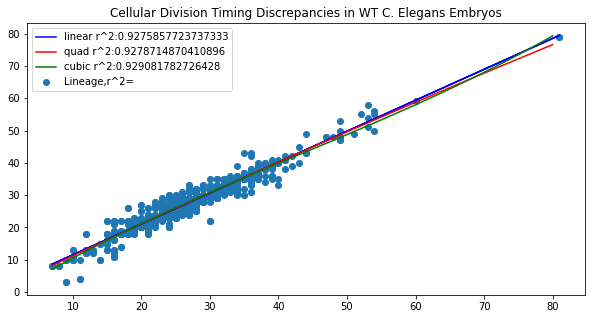

In [371]:
x,y = dict_to_scatter(nameset,dictset,1,10,img=True,tier = True); match_fit(x,y)

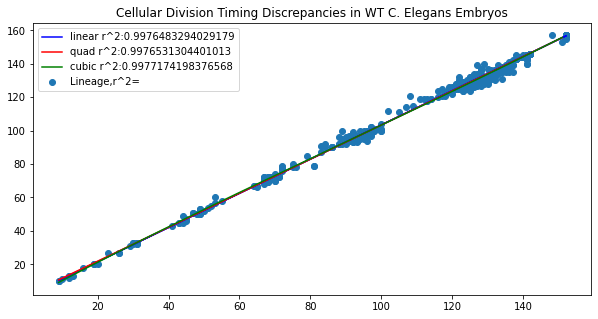

In [372]:
x,y = dict_to_scatter(nameset,globaldictset,1,10,img=True,tier = True); match_fit(x,y)

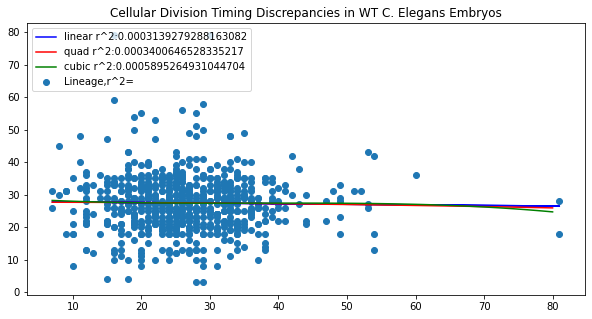

In [373]:
x,y = dict_to_scatter(nameset,scrambledictset,1,10,img=True,tier = True); match_fit(x,y)

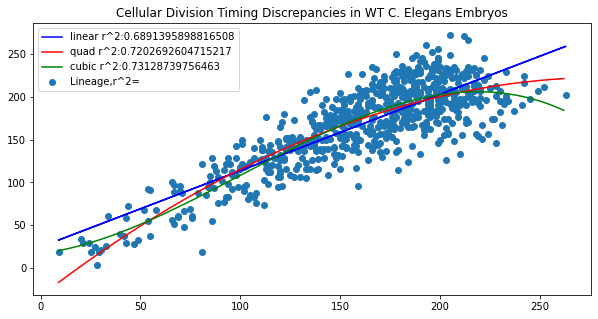

In [374]:
x,y = dict_to_scatter(nameset,globalscrambledictset,1,10,img=True,tier = True); match_fit(x,y)

In [375]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    #n = 40
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(8, 8)
    plt.show()

In [376]:
'''
https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py
'''

'\nhttps://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py\n'

In [377]:
r_mat = [];g_mat = [];s_mat=[];gs_mat=[]
for n in range(0,len(nameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,n+1):
        m2,b,r,name1,name2 = dict_to_scatter(nameset,dictset,n,m)
        r_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter(nameset,globaldictset,n,m)
        g_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter(nameset,scrambledictset,n,m)
        s_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter(nameset,globalscrambledictset,n,m)
        gs_row.append(r**2)
    zee = ( [0] * (30 - m - 1))
    r_mat.append(r_row+zee);g_mat.append(g_row+zee);s_mat.append(s_row+zee);gs_mat.append(gs_row+zee)
    #print(len(zee))
#r_mat.reverse()
r_mat = (np.mat(r_mat).T + np.mat(r_mat)) - np.diag([1]*len(r_mat))
g_mat = (np.mat(g_mat).T + np.mat(g_mat)) - np.diag([1]*len(g_mat))
s_mat = (np.mat(s_mat).T + np.mat(s_mat)) - np.diag([1]*len(s_mat))
gs_mat = (np.mat(gs_mat).T + np.mat(gs_mat)) - np.diag([1]*len(gs_mat))

sorttypes = ['cycle time','birth time', 'T.E.D', 'B.E.D. Cycle Time','B.E.D. Birth Time']
sortlists = []

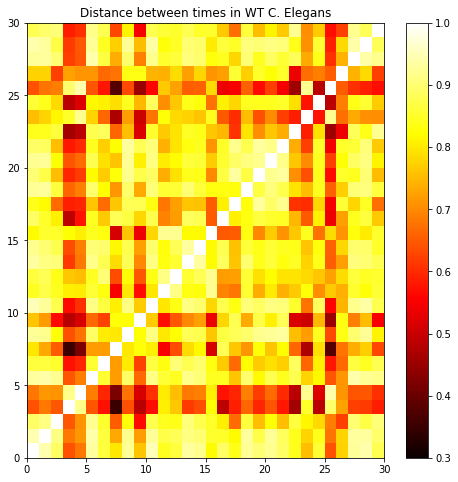

In [378]:
plot_2_examples(['hot'],np.mat(r_mat)) #r^2 of plots

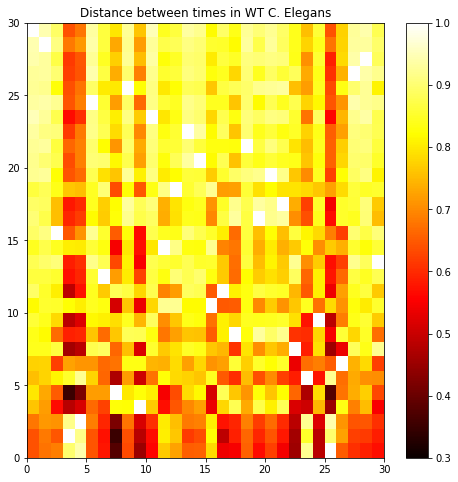

[matrix([[25,  3,  4,  9,  7, 23, 26, 22, 17, 24, 15, 16,  6, 29, 11,  2,
          19, 21, 12, 20, 14, 18, 13, 10,  5,  8, 27, 28,  1,  0]])]

In [379]:
x = np.argsort(r_mat.sum(axis=0))
plot_2_examples(['hot'],np.mat(r_mat[x][0]))
sortlists.append(x)
sortlists

In [380]:
#clustering = AgglomerativeClustering(n_clusters = 2).fit(np.mat(r_mat))
#np.where(clustering.labels_ > 0)

In [381]:
r_mat.sum(axis=0)

matrix([[25.74608162, 25.70869966, 24.28100786, 19.57643569, 20.4613006 ,
         25.18710381, 23.73344095, 20.99058622, 25.18861148, 20.92204291,
         25.18014498, 23.90859884, 24.48345081, 25.15792271, 25.13711669,
         23.46423396, 23.59185851, 22.93246165, 25.14715524, 24.35265009,
         25.01960767, 24.41448937, 22.40902947, 21.77586061, 23.14149228,
         19.42162351, 22.3716363 , 25.20539906, 25.35951697, 23.84687047]])

In [382]:
np.sort(r_mat.sum(axis=0))

matrix([[19.42162351, 19.57643569, 20.4613006 , 20.92204291, 20.99058622,
         21.77586061, 22.3716363 , 22.40902947, 22.93246165, 23.14149228,
         23.46423396, 23.59185851, 23.73344095, 23.84687047, 23.90859884,
         24.28100786, 24.35265009, 24.41448937, 24.48345081, 25.01960767,
         25.13711669, 25.14715524, 25.15792271, 25.18014498, 25.18710381,
         25.18861148, 25.20539906, 25.35951697, 25.70869966, 25.74608162]])

In [383]:
np.argsort(r_mat.sum(axis=0))

matrix([[25,  3,  4,  9,  7, 23, 26, 22, 17, 24, 15, 16,  6, 29, 11,  2,
         19, 21, 12, 20, 14, 18, 13, 10,  5,  8, 27, 28,  1,  0]])

In [384]:
#This plots all of the distances between nodes
'''trip = np.triu(np.mat(r_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )'''
''''''

''

(array([2., 0., 1., 2., 0., 1., 1., 1., 2., 2., 3., 3., 1., 8., 3.]),
 array([19.42162351, 19.84325405, 20.26488459, 20.68651513, 21.10814567,
        21.52977621, 21.95140675, 22.37303729, 22.79466784, 23.21629838,
        23.63792892, 24.05955946, 24.48119   , 24.90282054, 25.32445108,
        25.74608162]),
 <BarContainer object of 15 artists>)

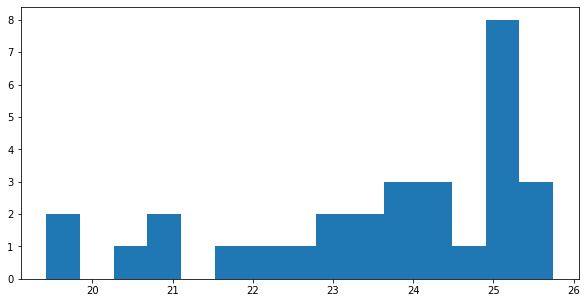

In [385]:
#returns aggregate distances between nodes
#rip = np.triu(np.mat(r_mat))
#trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

trip = r_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )

' '

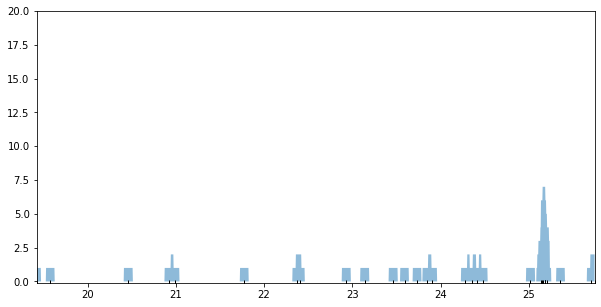

In [386]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .05) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 20]);
''' '''

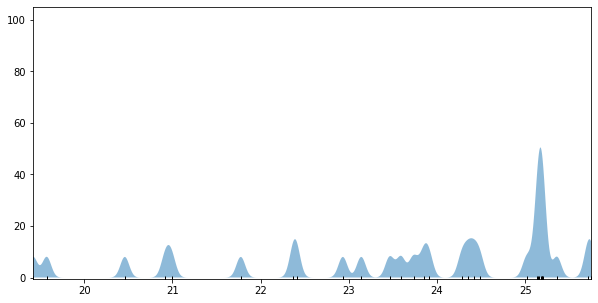

In [387]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.05).pdf(x_d) for xi in trip) * 1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.5), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 105]);

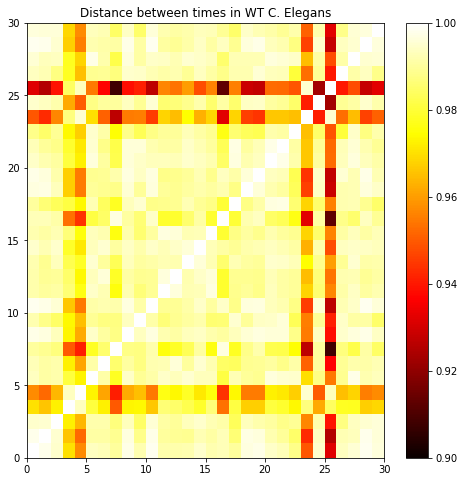

In [388]:
plot_2_examples(['hot'],np.mat(g_mat)) #r^2 of 

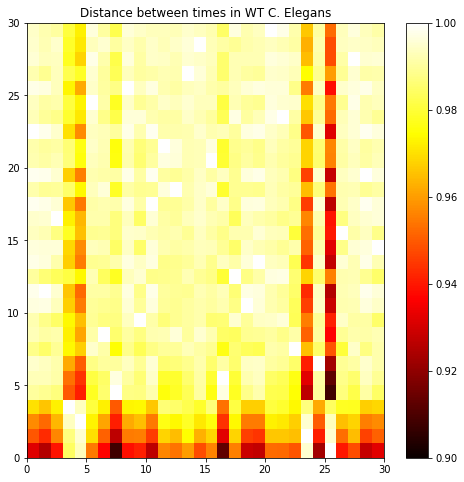

[matrix([[25,  3,  4,  9,  7, 23, 26, 22, 17, 24, 15, 16,  6, 29, 11,  2,
          19, 21, 12, 20, 14, 18, 13, 10,  5,  8, 27, 28,  1,  0]]),
 matrix([[25, 23,  4,  3,  7, 16, 24, 22,  6,  9, 18,  1, 17, 19, 29, 26,
           2, 10, 12, 28, 15, 11,  0, 21,  5,  8, 13, 27, 14, 20]])]

In [389]:
x = np.argsort(g_mat.sum(axis=0))
plot_2_examples(['hot'],np.mat(g_mat[x][0]))
sortlists.append(x)
sortlists

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,  0.,
         7., 17.]),
 array([28.39832135, 28.48428793, 28.57025451, 28.6562211 , 28.74218768,
        28.82815426, 28.91412084, 29.00008742, 29.086054  , 29.17202059,
        29.25798717, 29.34395375, 29.42992033, 29.51588691, 29.60185349,
        29.68782008]),
 <BarContainer object of 15 artists>)

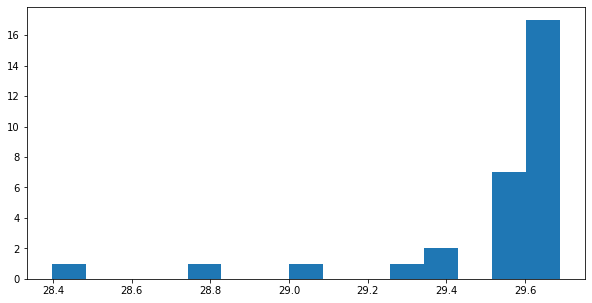

In [390]:
'''trip = np.triu(np.mat(g_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )
'''

trip = g_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )

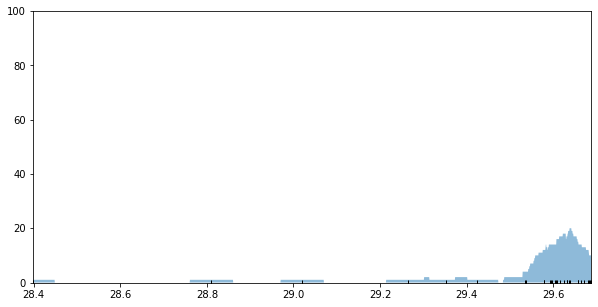

In [391]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .05) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 100]);

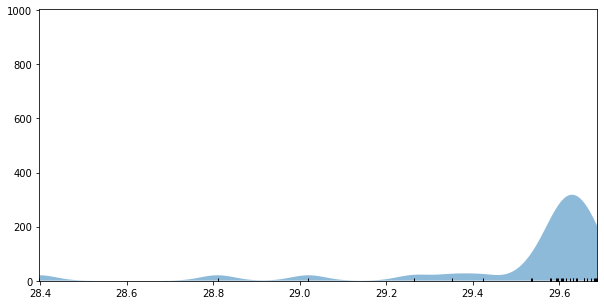

In [392]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.04).pdf(x_d) for xi in trip) * 2
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.5), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1005]);

In [393]:
#plot_2_examples(['hot'],np.mat(s_mat))

In [394]:
'''trip = np.triu(np.mat(s_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )'''

'trip = np.triu(np.mat(s_mat))\ntrip = np.sort(trip.flatten())\ntrip = trip[int(len(trip)/2):-truncator]\n\nplt.hist(trip, bins = truncator )'

In [395]:
#plot_2_examples(['hot'],np.mat(gs_mat))

In [396]:
'''trip = np.triu(np.mat(gs_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )'''

'trip = np.triu(np.mat(gs_mat))\ntrip = np.sort(trip.flatten())\ntrip = trip[int(len(trip)/2):-truncator]\n\nplt.hist(trip, bins = truncator )'

In [397]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 0.02) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 120]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 0.02) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 120]);"

In [398]:
def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))
#I guess issa metric
ted_list = []
t_mat = []
for n in range(0,len(nameset)):
    r_row = []
    for m in range(0,n+1):
        k = tree_edit_distance(dictset[n],dictset[m])
        r_row.append(k)
        ted_list.append(k)
    zee = ( [0] * (30 - m - 1))
    t_mat.append(r_row+zee)

t_mat = (np.mat(t_mat).T + np.mat(t_mat)) - np.diag([1]*len(t_mat))

#for n in ted_list: print(n)

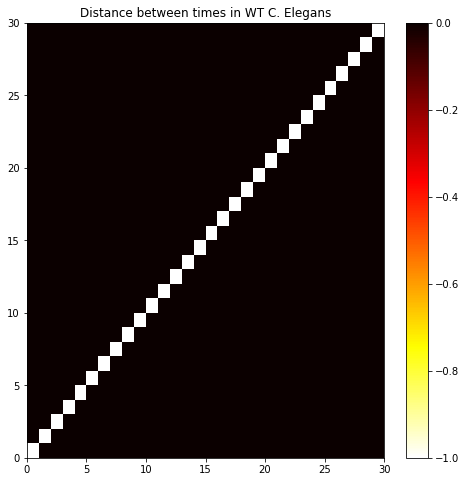

In [399]:
plot_2_examples(['hot_r'],np.mat(t_mat))

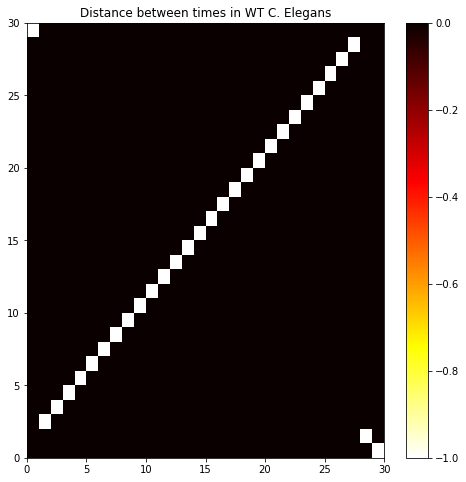

[matrix([[25,  3,  4,  9,  7, 23, 26, 22, 17, 24, 15, 16,  6, 29, 11,  2,
          19, 21, 12, 20, 14, 18, 13, 10,  5,  8, 27, 28,  1,  0]]),
 matrix([[25, 23,  4,  3,  7, 16, 24, 22,  6,  9, 18,  1, 17, 19, 29, 26,
           2, 10, 12, 28, 15, 11,  0, 21,  5,  8, 13, 27, 14, 20]]),
 matrix([[29, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
          15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  0]])]

In [400]:
x = np.argsort(t_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
plot_2_examples(['hot_r'],np.mat(t_mat[x][0]))
sortlists.append(x)
sortlists

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([-1.5       , -1.43333333, -1.36666667, -1.3       , -1.23333333,
        -1.16666667, -1.1       , -1.03333333, -0.96666667, -0.9       ,
        -0.83333333, -0.76666667, -0.7       , -0.63333333, -0.56666667,
        -0.5       ]),
 <BarContainer object of 15 artists>)

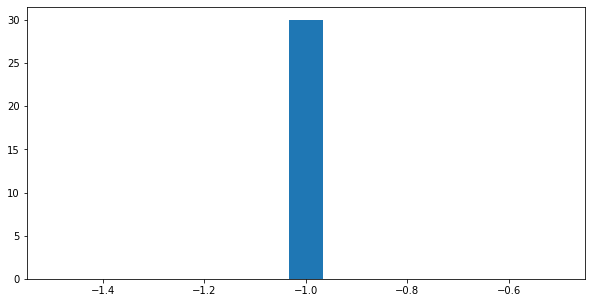

In [401]:
'''trip = np.triu(np.mat(t_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )'''

trip = t_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )

/tmp/ipykernel_1049513/2344828623.py:13: UserWarning: Attempting to set identical left == right == -1 results in singular transformations; automatically expanding.
  plt.axis([min(trip), max(trip), -0.5, 25]);


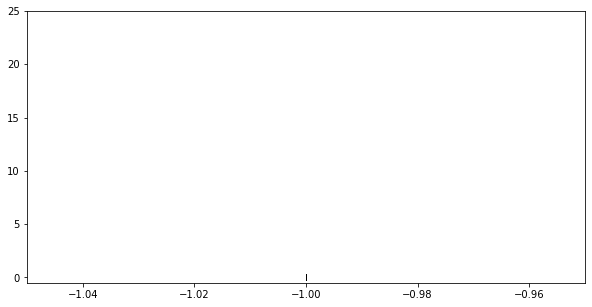

In [402]:
''' 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
https://www.wessa.net/rwasp_density.wasp#output
'''

x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 50) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.5, 25]);

/tmp/ipykernel_1049513/448296958.py:6: UserWarning: Attempting to set identical left == right == -1 results in singular transformations; automatically expanding.
  plt.axis([min(trip), max(trip), -0.5, 1]);


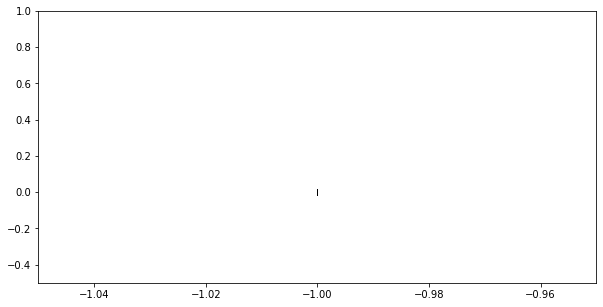

In [403]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,20).pdf(x_d) for xi in trip) *1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1]);

In [404]:
'''ted_mat_reals = np.where(-abs(np.array(t_mat)-20)+19 > 0, -1, 0)
#for n in range(len(np.array(ted_mat_real))): ted_mat_real[n][n] = (-np.sum(np.array(ted_mat_real)[n]))
#print(ted_mat_real)
plot_2_examples(['hot'],np.mat(ted_mat_reals)) #black are edges'''

"ted_mat_reals = np.where(-abs(np.array(t_mat)-20)+19 > 0, -1, 0)\n#for n in range(len(np.array(ted_mat_real))): ted_mat_real[n][n] = (-np.sum(np.array(ted_mat_real)[n]))\n#print(ted_mat_real)\nplot_2_examples(['hot'],np.mat(ted_mat_reals)) #black are edges"

In [405]:
def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [406]:
b_mat = [];bg_mat = [];bs_mat=[];bgs_mat=[]

for n in range(0,len(nameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,n+1):
        r_row.append(branch_distance(dictset[n],dictset[m]))
        g_row.append(branch_distance(globaldictset[n],globaldictset[m]))
        s_row.append(branch_distance(scrambledictset[n],scrambledictset[m]))
        gs_row.append(branch_distance(globalscrambledictset[n],globalscrambledictset[m]))
    zee = ( [0] * (30 - m - 1))
    b_mat.append(r_row+zee);bg_mat.append(g_row+zee);bs_mat.append(s_row+zee);bgs_mat.append(gs_row+zee)
    #print(len(zee))
#r_mat.reverse()
b_mat = (np.mat(b_mat).T + np.mat(b_mat)) - np.diag([1]*len(b_mat))
bg_mat = (np.mat(bg_mat).T + np.mat(bg_mat)) - np.diag([1]*len(bg_mat))
bs_mat = (np.mat(bs_mat).T + np.mat(bs_mat)) - np.diag([1]*len(bs_mat))
bgs_mat = (np.mat(bgs_mat).T + np.mat(bgs_mat)) - np.diag([1]*len(bgs_mat))

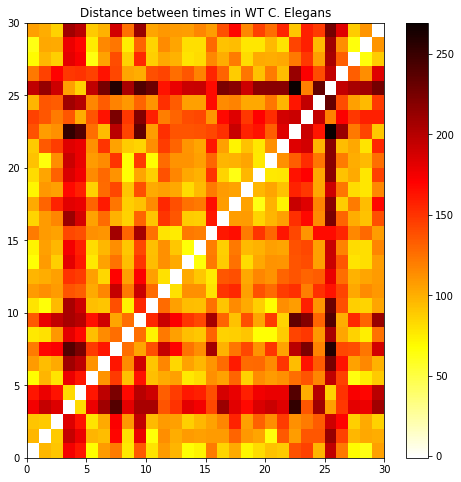

In [407]:
plot_2_examples(['hot_r'],np.mat(b_mat))

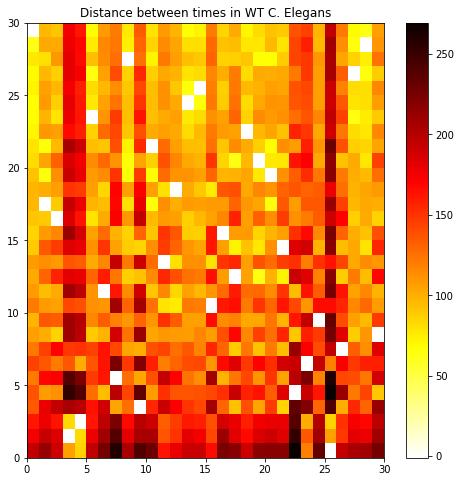

[matrix([[25,  3,  4,  9,  7, 23, 26, 22, 17, 24, 15, 16,  6, 29, 11,  2,
          19, 21, 12, 20, 14, 18, 13, 10,  5,  8, 27, 28,  1,  0]]),
 matrix([[25, 23,  4,  3,  7, 16, 24, 22,  6,  9, 18,  1, 17, 19, 29, 26,
           2, 10, 12, 28, 15, 11,  0, 21,  5,  8, 13, 27, 14, 20]]),
 matrix([[29, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
          15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  0]]),
 matrix([[25,  3,  4,  9, 22,  7, 23, 26, 29, 24, 15,  6, 17, 11, 21, 16,
           2,  1, 12, 20, 19, 10, 18,  5, 13, 14, 27,  8, 28,  0]])]

In [408]:
x = np.argsort(b_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
plot_2_examples(['hot_r'],np.mat(b_mat[x][0]))
sortlists.append(x)
sortlists

(array([5., 5., 4., 3., 5., 1., 0., 1., 3., 1., 0., 1., 0., 0., 1.]),
 array([3036.24092507, 3219.01446056, 3401.78799605, 3584.56153154,
        3767.33506703, 3950.10860252, 4132.88213801, 4315.6556735 ,
        4498.42920899, 4681.20274448, 4863.97627997, 5046.74981546,
        5229.52335095, 5412.29688644, 5595.07042193, 5777.84395742]),
 <BarContainer object of 15 artists>)

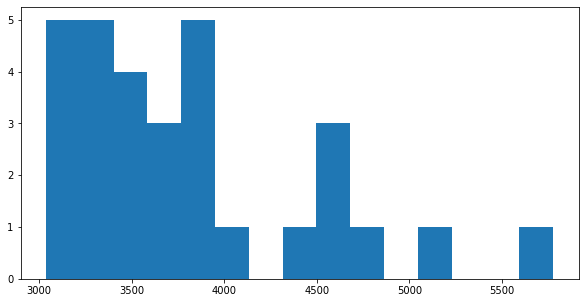

In [409]:
'''
trip = np.triu(np.mat(b_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )

'''
trip = b_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )



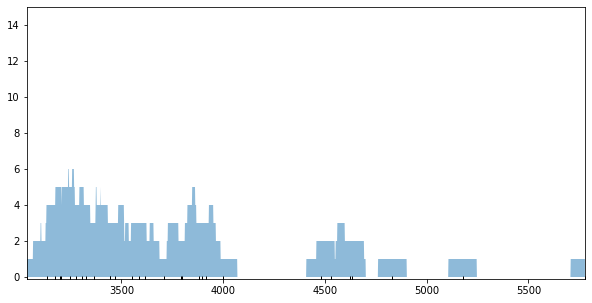

In [410]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 70) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 15]);

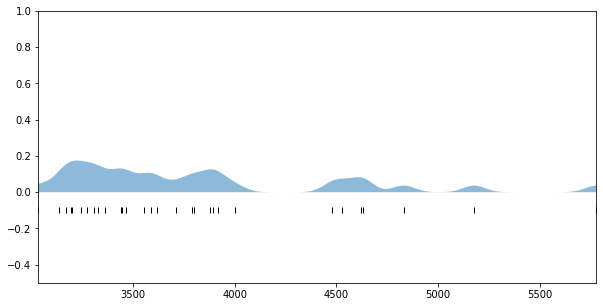

In [411]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,55).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1]);

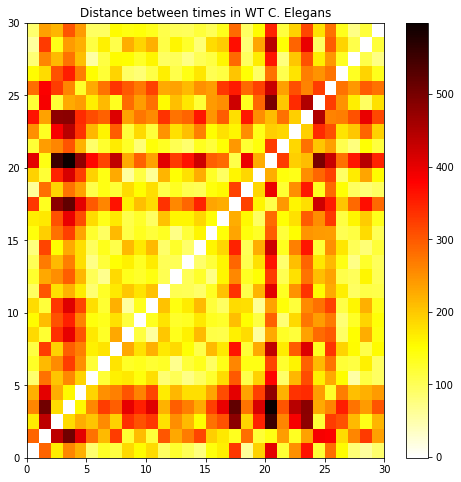

In [412]:
plot_2_examples(['hot_r'],np.mat(bg_mat))

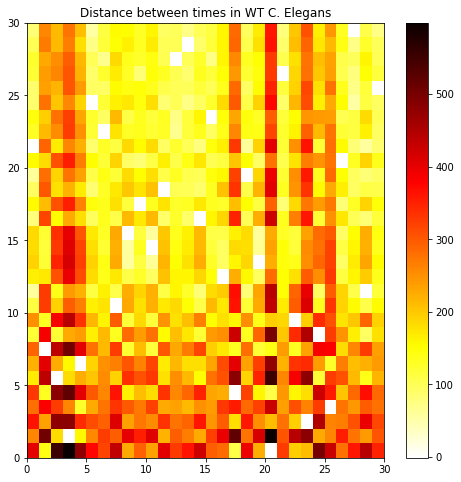

[matrix([[25,  3,  4,  9,  7, 23, 26, 22, 17, 24, 15, 16,  6, 29, 11,  2,
          19, 21, 12, 20, 14, 18, 13, 10,  5,  8, 27, 28,  1,  0]]),
 matrix([[25, 23,  4,  3,  7, 16, 24, 22,  6,  9, 18,  1, 17, 19, 29, 26,
           2, 10, 12, 28, 15, 11,  0, 21,  5,  8, 13, 27, 14, 20]]),
 matrix([[29, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
          15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  0]]),
 matrix([[25,  3,  4,  9, 22,  7, 23, 26, 29, 24, 15,  6, 17, 11, 21, 16,
           2,  1, 12, 20, 19, 10, 18,  5, 13, 14, 27,  8, 28,  0]]),
 matrix([[20,  3, 23, 25, 17,  2,  4,  1, 24, 22,  7, 28, 16, 19, 10,  8,
          14,  9, 11, 18, 26,  0,  6, 15,  5, 29, 21, 12, 13, 27]])]

In [413]:
x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
plot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))
sortlists.append(x)
sortlists

(array([9., 6., 4., 0., 1., 1., 1., 1., 1., 2., 1., 0., 1., 1., 1.]),
 array([4651.93876587, 5006.49335687, 5361.04794787, 5715.60253887,
        6070.15712987, 6424.71172088, 6779.26631188, 7133.82090288,
        7488.37549388, 7842.93008488, 8197.48467588, 8552.03926688,
        8906.59385788, 9261.14844888, 9615.70303988, 9970.25763089]),
 <BarContainer object of 15 artists>)

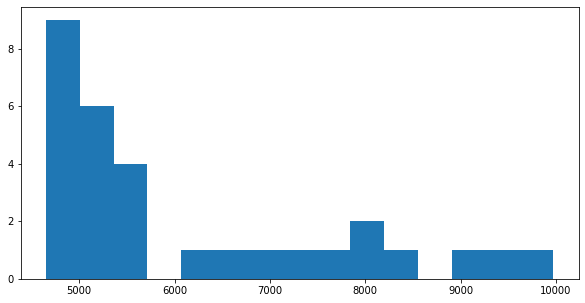

In [414]:
'''
trip = np.triu(np.mat(bg_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins =truncator )'''

trip = bg_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )


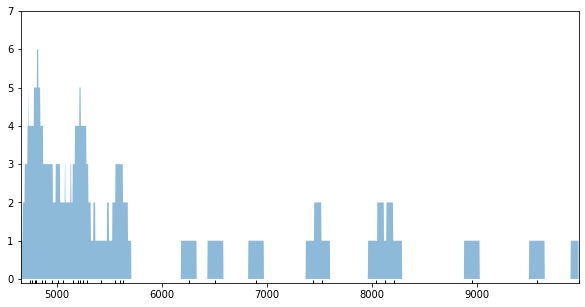

In [415]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 75) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 7]);

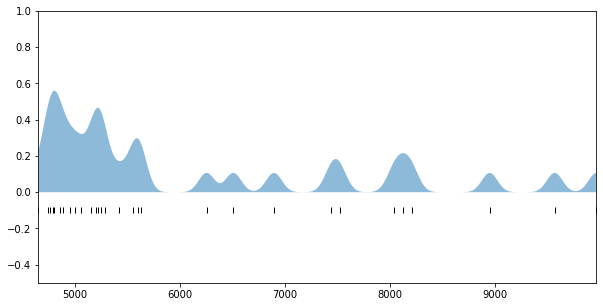

In [416]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,75).pdf(x_d) for xi in trip) * 20
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1]);

In [417]:
#plot_2_examples(['hot_r'],np.mat(bs_mat))

In [418]:
'''trip = np.triu(np.mat(bs_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )'''
''''''

''

In [419]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 5) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 110]);''' 

''''''

''

In [420]:
#plot_2_examples(['hot_r'],np.mat(bgs_mat))

In [421]:
'''trip = np.triu(np.mat(bgs_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )'''
''''''

''

In [422]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 50) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 170]);'''
''''''

''

In [423]:
#for n in rem_dang_ranks:
#    print(n,type(n))

In [424]:
sortlists

[matrix([[25,  3,  4,  9,  7, 23, 26, 22, 17, 24, 15, 16,  6, 29, 11,  2,
          19, 21, 12, 20, 14, 18, 13, 10,  5,  8, 27, 28,  1,  0]]),
 matrix([[25, 23,  4,  3,  7, 16, 24, 22,  6,  9, 18,  1, 17, 19, 29, 26,
           2, 10, 12, 28, 15, 11,  0, 21,  5,  8, 13, 27, 14, 20]]),
 matrix([[29, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
          15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  0]]),
 matrix([[25,  3,  4,  9, 22,  7, 23, 26, 29, 24, 15,  6, 17, 11, 21, 16,
           2,  1, 12, 20, 19, 10, 18,  5, 13, 14, 27,  8, 28,  0]]),
 matrix([[20,  3, 23, 25, 17,  2,  4,  1, 24, 22,  7, 28, 16, 19, 10,  8,
          14,  9, 11, 18, 26,  0,  6, 15,  5, 29, 21, 12, 13, 27]])]

In [425]:
def dict_to_scatter_lineage(name,lis,x,y,img = False,seps='', tier = False):
    #plt.figure().clear()
    gong = ['AB','C','D','MS','E']
    Subsetylist = [[],[],[],[],[]]
    Subsetxlist = [[],[],[],[],[]]
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    for n in (list(set(lis[x]).intersection(set(lis[y])))):
        for m in range(0,len(gong)):
            if gong[m] in n:
                Subsetylist[m].append(lis[x][n]);Subsetxlist[m].append(lis[y][n])
                continue
        xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    name1,name2 = name1[18:-7],name2[18:-7]
    plt.title('Embryonic Timing Discrepancies between '+name1+' &\n'+name2+' Common Nodes')
    plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    for n in range(len(Subsetxlist)):
        plt.scatter(np.array(Subsetxlist[n]),Subsetylist[n], label=gong[n], s = [30] * len(Subsetxlist[n]), alpha = .35)
    plt.legend(loc='upper left')
    fig = plt.figure(1)
    rect = fig.patch
    rect.set_facecolor("white")
    hold = name1+'('+str(x)+')x'+name2+'('+str(y)+')_common'
    plt.savefig(hold, facecolor=fig.get_facecolor())
    #plt.show()
    print(name1+'('+str(x)+')x'+name2+'('+str(y)+')')
    plt.close()
    print(x,y)
    


In [426]:
os.getcwd()

'/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/WT_to_tree_5'

In [427]:
#os.chdir('../')

In [428]:
#directory = directory + '/figures/'
#os.chdir(directory)

In [429]:
'''
for n in range(0,len(nameset)):
    for m in range(0,n):
        print(n,m)
        dict_to_scatter_lineage(nameset,dictset,n,m,img=True,seps = 'AB') '''

"\nfor n in range(0,len(nameset)):\n    for m in range(0,n):\n        print(n,m)\n        dict_to_scatter_lineage(nameset,dictset,n,m,img=True,seps = 'AB') "

In [430]:
#dict_to_scatter_lineage(nameset,dictset,1,13,img=True,seps = 'AB')

In [439]:
#for n in dictset: print(p.issubset(n))